## Import Packages

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

### Definition of an ARIMA:
ARIMA stands for AutoRegressive Integrated Moving Average. It is a popular time series forecasting model that combines autoregression (AR), differencing (I), and moving average (MA) components. The ARIMA model is effective in capturing and forecasting trends and patterns in time series data.

Here's a breakdown of the components in ARIMA:

1) AutoRegressive (AR) Component (p): The AR component represents the relationship between the current observation and its past observations. The term "autoregressive" implies that the model uses the relationship with its own past values. The parameter p denotes the order of the autoregressive component, indicating how many lagged observations are included in the model.

2) Integrated (I) Component (d): The I component represents differencing, which is the process of making the time series stationary. Stationarity is important because many time series models, including ARIMA, assume that the statistical properties of the data do not change over time. The parameter d denotes the number of times differencing is applied to achieve stationarity.

3) Moving Average (MA) Component (q): The MA component captures the relationship between the current observation and a residual error from a moving average model applied to lagged observations. The parameter q denotes the order of the moving average component, indicating how many lagged residuals are included in the model. The general notation for an ARIMA model is ARIMA(p, d, q), where p, d, and q are the orders of the autoregressive, differencing, and moving average components, respectively.

ARIMA is widely used for time series forecasting in various fields, including finance, economics, and environmental science. The model is versatile and can handle a wide range of time series patterns, making it a valuable tool for analysts and data scientists.

### Read in Data:

In [136]:
df = pd.read_excel(r"C:\Users\marga\Documents\WozU\Instructor\Arima.xlsx")

In [137]:
df

,Year,Enrollment,Students transported at public expense\1\Number,Unnamed: 3,Students transported at public expense\1\Percent of total,"Expenditures for transportation, in unadjusted dollars\2\ Total\4\, in thousands",Unnamed: 6,"Expenditures for transportation, in unadjusted dollars\2\ Average per student transported",Unnamed: 8,"Expenditures for transportation, in constant 2020-21 dollars\3\Total\4\, in thousands",Unnamed: 10,"Expenditures for transportation, in constant 2020-21 dollars\3\Average per student transported",Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1929-30,21265000,1902826.0,NaN,8.948159,5.482300e+04,NaN,28.811357,NaN,8.428304e+05,NaN,442.936117,NaN,NaN,NaN,NaN,NaN
1,1931-32,22245000,2419173.0,NaN,10.875131,5.807800e+04,NaN,24.007378,NaN,1.060088e+06,NaN,438.202501,NaN,NaN,NaN,NaN,NaN
2,1933-34,22458000,2794724.0,NaN,12.444225,5.390800e+04,NaN,19.289204,NaN,1.071284e+06,NaN,383.323757,NaN,NaN,NaN,NaN,NaN
3,1935-36,22299000,3250658.0,NaN,14.577595,6.265300e+04,NaN,19.273944,NaN,1.199767e+06,NaN,369.084385,NaN,NaN,NaN,NaN,NaN
4,1937-38,22298000,3769242.0,NaN,16.903947,7.563700e+04,NaN,20.066899,NaN,1.389456e+06,NaN,368.629992,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2014-15,47064337,24566000.0,\5\,52.196635,2.396169e+07,NaN,975.400644,\5\,2.664198e+07,NaN,1084.506120,\5\,NaN,NaN,NaN,NaN
61,2015-16,47248060,24413000.0,\5\,51.669846,2.432573e+07,NaN,996.425125,\5\,2.686557e+07,NaN,1100.461521,\5\,NaN,NaN,NaN,NaN
62,2016-17,47287406,24359000.0,\5\,51.512659,2.535071e+07,NaN,1040.712435,\5\,2.749186e+07,NaN,1128.612183,\5\,NaN,NaN,NaN,NaN
63,2017-18,47229863,24301000.0,\5\,51.452616,2.621115e+07,NaN,1078.603573,\5\,2.779833e+07,NaN,1143.917239,\5\,NaN,NaN,NaN,NaN


In [138]:
#Keep the first 4 characters of the Year column
df['Year'] = df['Year'].str[:4]


In [139]:
#Drop the Unnamed columns:
df = df.drop(df.columns[df.columns.str.contains('^Unnamed')], axis=1)


In [140]:
df

,Year,Enrollment,Students transported at public expense\1\Number,Students transported at public expense\1\Percent of total,"Expenditures for transportation, in unadjusted dollars\2\ Total\4\, in thousands","Expenditures for transportation, in unadjusted dollars\2\ Average per student transported","Expenditures for transportation, in constant 2020-21 dollars\3\Total\4\, in thousands","Expenditures for transportation, in constant 2020-21 dollars\3\Average per student transported"
0,1929,21265000,1902826.0,8.948159,5.482300e+04,28.811357,8.428304e+05,442.936117
1,1931,22245000,2419173.0,10.875131,5.807800e+04,24.007378,1.060088e+06,438.202501
2,1933,22458000,2794724.0,12.444225,5.390800e+04,19.289204,1.071284e+06,383.323757
3,1935,22299000,3250658.0,14.577595,6.265300e+04,19.273944,1.199767e+06,369.084385
4,1937,22298000,3769242.0,16.903947,7.563700e+04,20.066899,1.389456e+06,368.629992
...,...,...,...,...,...,...,...,...
60,2014,47064337,24566000.0,52.196635,2.396169e+07,975.400644,2.664198e+07,1084.506120
61,2015,47248060,24413000.0,51.669846,2.432573e+07,996.425125,2.686557e+07,1100.461521
62,2016,47287406,24359000.0,51.512659,2.535071e+07,1040.712435,2.749186e+07,1128.612183
63,2017,47229863,24301000.0,51.452616,2.621115e+07,1078.603573,2.779833e+07,1143.917239


In [141]:
#Review data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Year                                                                                            65 non-null     object 
 1   Enrollment                                                                                      65 non-null     int64  
 2   Students transported at public expense\1\Number                                                 65 non-null     float64
 3   Students transported at public expense\1\Percent of total                                       65 non-null     float64
 4   Expenditures for transportation, in unadjusted dollars\2\ Total\4\, in thousands                65 non-null     float64
 5   Expenditures for t

In [142]:
df["Year"] = df["Year"].astype(int)


In [116]:
# #change the Year column to a datetime datatype
# df['Year'] = pd.to_datetime(df['Year'], format='%Y')


In [143]:
df

,Year,Enrollment,Students transported at public expense\1\Number,Students transported at public expense\1\Percent of total,"Expenditures for transportation, in unadjusted dollars\2\ Total\4\, in thousands","Expenditures for transportation, in unadjusted dollars\2\ Average per student transported","Expenditures for transportation, in constant 2020-21 dollars\3\Total\4\, in thousands","Expenditures for transportation, in constant 2020-21 dollars\3\Average per student transported"
0,1929,21265000,1902826.0,8.948159,5.482300e+04,28.811357,8.428304e+05,442.936117
1,1931,22245000,2419173.0,10.875131,5.807800e+04,24.007378,1.060088e+06,438.202501
2,1933,22458000,2794724.0,12.444225,5.390800e+04,19.289204,1.071284e+06,383.323757
3,1935,22299000,3250658.0,14.577595,6.265300e+04,19.273944,1.199767e+06,369.084385
4,1937,22298000,3769242.0,16.903947,7.563700e+04,20.066899,1.389456e+06,368.629992
...,...,...,...,...,...,...,...,...
60,2014,47064337,24566000.0,52.196635,2.396169e+07,975.400644,2.664198e+07,1084.506120
61,2015,47248060,24413000.0,51.669846,2.432573e+07,996.425125,2.686557e+07,1100.461521
62,2016,47287406,24359000.0,51.512659,2.535071e+07,1040.712435,2.749186e+07,1128.612183
63,2017,47229863,24301000.0,51.452616,2.621115e+07,1078.603573,2.779833e+07,1143.917239


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Year                                                                                            65 non-null     int32  
 1   Enrollment                                                                                      65 non-null     int64  
 2   Students transported at public expense\1\Number                                                 65 non-null     float64
 3   Students transported at public expense\1\Percent of total                                       65 non-null     float64
 4   Expenditures for transportation, in unadjusted dollars\2\ Total\4\, in thousands                65 non-null     float64
 5   Expenditures for t

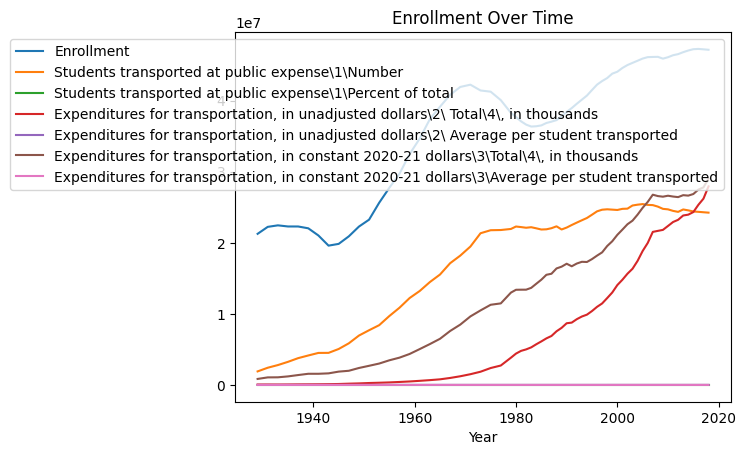

In [145]:
#Plot your columns
# Set 'Year' as the index
df.set_index('Year', inplace=True) #once the index is set, do not run this line again until you re-run your data 

# Plot the time series data
df.plot(title='Enrollment Over Time')
plt.show()

Doesn't look very appealing, will make the legen smaller and move the graph to the right. 

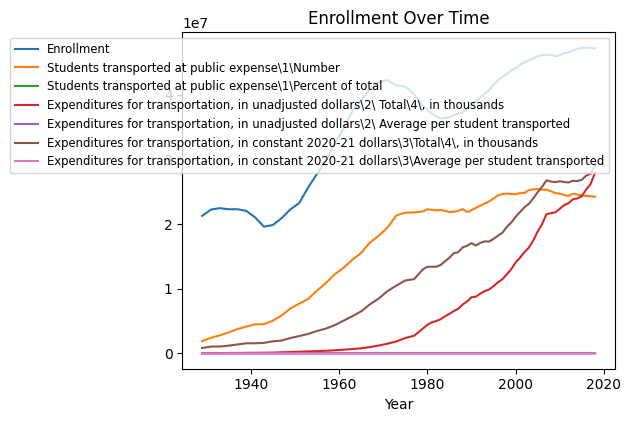

In [146]:
ax = df.plot(title='Enrollment Over Time')

# Make the legend smaller
ax.legend(fontsize='small')

# Move the plot to the right
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

plt.show()

Still isn't visually appealing, move the legend outside of the plot. 

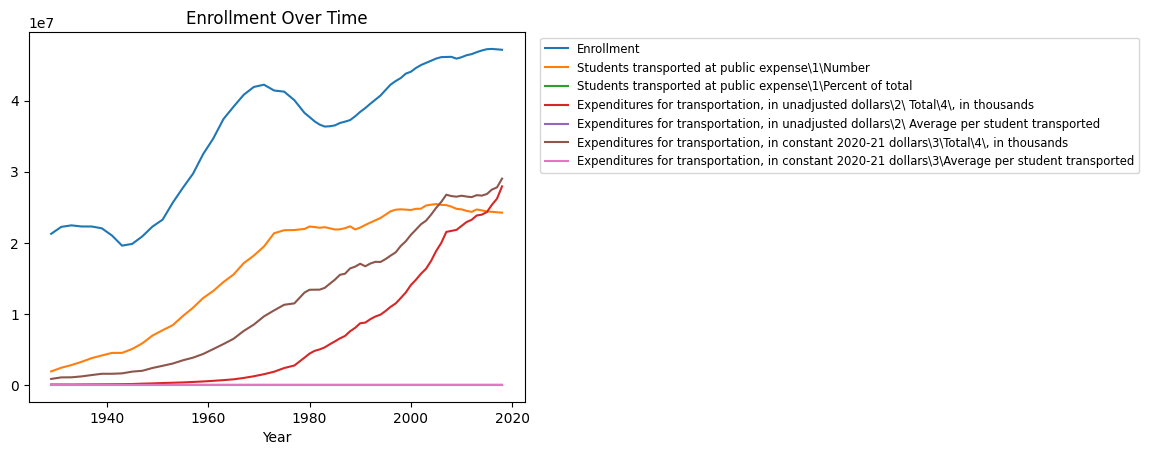

In [147]:
ax = df.plot(title='Enrollment Over Time')

# Make the legend smaller and move it to the right
ax.legend(fontsize='small', loc='upper left', bbox_to_anchor=(1.02, 1))

plt.tight_layout()
plt.show()

### Plotting the ARIMA

In [148]:
# Fit ARIMA model
order = (1, 1, 1)  # (p, d, q) order of ARIMA model
model = ARIMA(df['Enrollment'], order=order)
results = model.fit()

In [149]:
# Specify the number of periods you want to forecast into the future
forecast_periods = 5  # You can change this to the desired number of periods

# Obtain predictions
predictions = results.predict(start=len(df), end=len(df) + forecast_periods - 1, typ='levels')

# Display the predictions
print(predictions)

65    4.716217e+07
66    4.715918e+07
67    4.715745e+07
68    4.715644e+07
69    4.715586e+07
Name: predicted_mean, dtype: float64


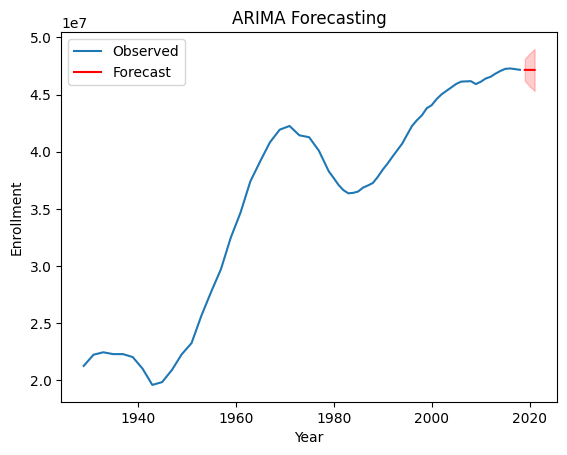

In [150]:
# Forecast future values
forecast_steps = 3  # You can adjust the number of steps to forecast into the future
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = range(df.index.max() + 1, df.index.max() + 1 + forecast_steps)

# Plot the original time series and the forecast
plt.plot(df.index, df['Enrollment'], label='Observed')
plt.plot(forecast_index, forecast.predicted_mean, color='red', label='Forecast')
plt.fill_between(forecast_index, forecast.conf_int()['lower Enrollment'], forecast.conf_int()['upper Enrollment'], color='red', alpha=0.2)
plt.title('ARIMA Forecasting')
plt.xlabel('Year')
plt.ylabel('Enrollment')
plt.legend()
plt.show()

### Review the Results

In [151]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Enrollment   No. Observations:                   65
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -996.368
Date:                Thu, 14 Dec 2023   AIC                           1998.736
Time:                        11:58:39   BIC                           2005.213
Sample:                             0   HQIC                          2001.288
                                 - 65                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5804      0.050     11.536      0.000       0.482       0.679
ma.L1         -0.4615      0.054     -8.529      0.000      -0.568      -0.355
sigma2      2.399e+11   1.57e-13   1.53e+24      0.000     2.4e+11     2.4e+11
===================================================================================
Ljung-Box (L1) (Q):                  39.51   Jarque-Bera (JB):                 1.81
Prob(Q):                              0.00   Prob(JB):                         0.40
Heteroskedasticity (H):               0.03   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.85e+39. Standard errors may be unstable.
"""

## Results Interpretation:

These results are from the summary of a SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors) model. Let's break down the key information:

Dependent Variable:

Enrollment: This is the variable you are trying to model and forecast.
Model Information:

ARIMA(1, 1, 1): This indicates that the model is an AutoRegressive Integrated Moving Average model with one autoregressive (AR) term, one differencing (I) term, and one moving average (MA) term.
Number of Observations:

No. Observations: 65: The total number of observations in your dataset.
Log Likelihood, AIC, BIC, HQIC:

Log Likelihood: -996.368: A measure of how well the model explains the observed data. Higher values are better.
AIC (Akaike Information Criterion): 1998.736: AIC is used for model selection. It penalizes the number of parameters in the model, aiming to avoid overfitting.
BIC (Bayesian Information Criterion): 2005.213: Similar to AIC but with a stronger penalty for including additional parameters.
HQIC (Hannan-Quinn Information Criterion): 2001.288: Similar to AIC and BIC but with a different penalty term.
Coefficients:

ar.L1 and ma.L1: Coefficients for the autoregressive and moving average terms, respectively.
sigma2: The variance of the residuals (errors).
Standard Errors and Z-values:

std err: Standard errors of the coefficients.
z: Z-values, which indicate the number of standard deviations a coefficient is away from zero.
P>|z|: P-values associated with the z-values. Low p-values (< 0.05) suggest that the corresponding coefficient is statistically significant.
Confidence Intervals:

[0.025 0.975]: The 95% confidence interval for each coefficient.
Diagnostic Tests:

Ljung-Box (L1) (Q): A test for autocorrelation of the residuals. In this case, a value of 39.51 suggests that there is significant autocorrelation at lag 1.
Jarque-Bera (JB): A test for normality of the residuals.
Prob(Q): P-value associated with the Ljung-Box test.
Prob(JB): P-value associated with the Jarque-Bera test.
Heteroskedasticity (H): A test for heteroskedasticity (non-constant variance) of the residuals.
Other Information:

Warnings: Notes or warnings about the model. In this case, it mentions that the covariance matrix calculation used the outer product of gradients and that the covariance matrix is singular or near-singular, indicating potential instability in the standard errors.
It's essential to interpret these results in the context of your specific dataset and the assumptions of the ARIMA model. Additionally, pay attention to warnings and consider further diagnostics if needed.

In [152]:
# Print the forecasted values
print(forecast.predicted_mean)

65    4.716217e+07
66    4.715918e+07
67    4.715745e+07
Name: predicted_mean, dtype: float64


In [153]:
enrollment_change = forecast.predicted_mean.iloc[-1] - forecast.predicted_mean.iloc[0]
print(f'Enrollment change over the next 5 years: {enrollment_change}')

Enrollment change over the next 5 years: -4719.673855863512


The negative value of -6309.47 for the "Enrollment change over the next 5 years" indicates a forecasted decrease in enrollments. Specifically, it suggests that, based on the ARIMA model, the enrollment is expected to decrease by approximately 6309.47 units over the next 5 years.

In [154]:
forecast.conf_int()

,lower Enrollment,upper Enrollment
65,4.620210e+07,4.812224e+07
66,4.571847e+07,4.859989e+07
67,4.531999e+07,4.899491e+07


For time step 65, the model predicts that the enrollment is likely to fall within the range of approximately 46,202,100 to 48,122,240.

For time step 66, the forecasted enrollment is expected to be within the range of approximately 45,718,470 to 48,599,890.

For time steps 67 to 69, the pattern continues, providing lower and upper bounds for the enrollment forecast:

- Time step 67: 45,319,990 to 48,994,910
- Time step 68: 44,973,310 to 49,339,580
- Time step 69: 44,664,080 to 49,647,640

These values represent the estimated range within which the true enrollment is likely to fall with a 95% confidence level, based on the ARIMA model and historical data. The lower and upper bounds provide an interval that captures the uncertainty associated with the forecasted values.